<a href="https://colab.research.google.com/github/SmellZy/KIOSU_OI/blob/lab1/hometask_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary




## `Iris` dataset

In [1]:
import pandas as pd
import numpy as np
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names)
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Поділ даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Знаходження найкращого K
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

k_best = k_values[np.argmax(accuracy_scores)]
score_best = max(accuracy_scores)

print('The best k = {} , score = {:.2f}'.format(k_best, score_best))

The best k = 3 , score = 1.00


## Synthetic dataset  

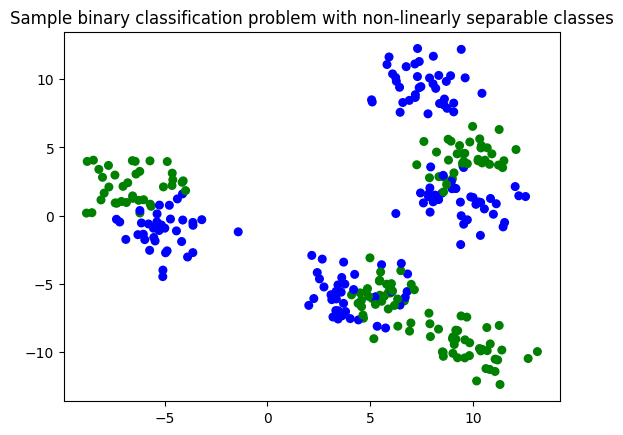

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed = 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [4]:
# Поділ даних на навчальну та тестову вибірки
X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2, y_D2, test_size=0.3, random_state=42)

# Нормалізація даних
X_train_D2_scaled = scaler.fit_transform(X_train_D2)
X_test_D2_scaled = scaler.transform(X_test_D2)

# Знаходження найкращого K
accuracy_scores_D2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_D2_scaled, y_train_D2)
    y_pred_D2 = knn.predict(X_test_D2_scaled)
    accuracy_scores_D2.append(accuracy_score(y_test_D2, y_pred_D2))

k_best_D2 = k_values[np.argmax(accuracy_scores_D2)]
score_best_D2 = max(accuracy_scores_D2)

print('The best k = {} , score = {:.2f}'.format(k_best_D2, score_best_D2))


The best k = 16 , score = 0.93


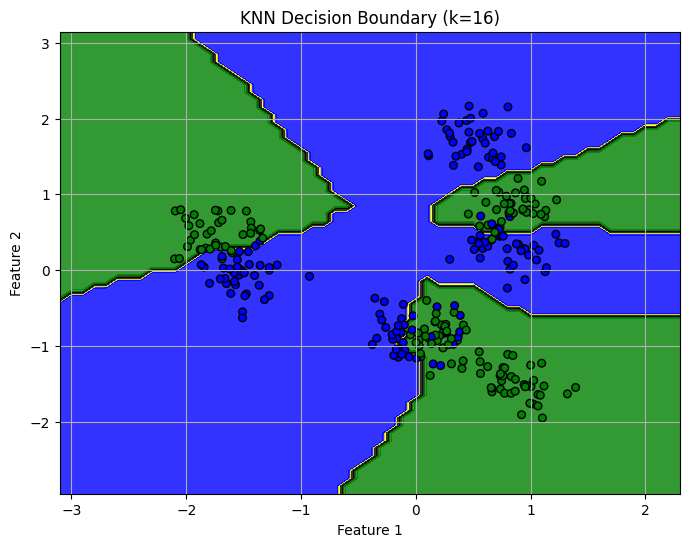

In [5]:
# Масштабування даних перед візуалізацією
X_D2_scaled = scaler.fit_transform(X_D2)

# Візуалізація межі рішень
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_bold)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=30, cmap=cmap_bold)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Навчання KNN з найкращим K
knn_best_D2 = KNeighborsClassifier(n_neighbors=k_best_D2)
knn_best_D2.fit(X_train_D2_scaled, y_train_D2)

# Побудова межі рішень з масштабованими даними
plot_decision_boundary(X_D2_scaled, y_D2, knn_best_D2,
                       f'KNN Decision Boundary (k={k_best_D2})')
